<a href="https://colab.research.google.com/github/inhoblock/Data_science-Study/blob/main/Chapter04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter4_2
확률적 경사 하강법
(Stochastic Gradient Descent)

앞서 배운 로지스틱 회귀는 훈련데이터가 추가될 때마다 새로 학습해야 하는 치명적인 단점이 존재한다.

확률적 경사 하강법은 모델을 새로 학습하는 것이 아니라 기존의 모델을 업데이트 하는 방식이다.

이때 선택하는 샘플의 방식에 따라 경사하강법 종류가 나뉩니다.

물론 전체 샘플을 사용하는 배치 경사 하강법이 가장 안정적이겠지만, 그만큼 컴퓨터 자원을 많이 사용하게 되기 때문에 적절한 방법을 택해야 합니다.

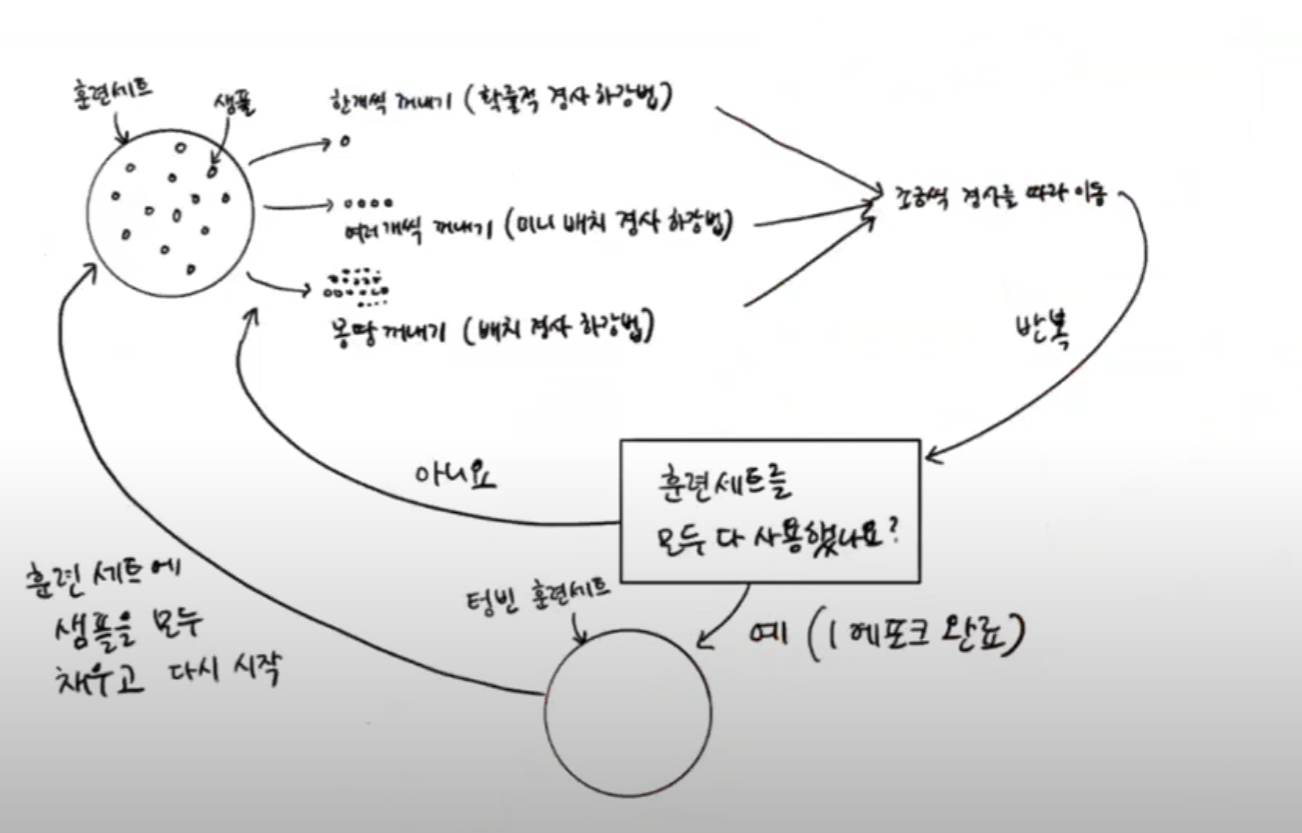

경사 하강법은 ML 알고리즘이 아닌 알고리즘을 최적화 하는 방법이다.

따라서 최적화 시킬 '가중치를 이용한 연속적인 손실 함수'가 필요하다.

회귀의 경우 값의 오차를 이용해 손실 함수를 정의할 수 있지만, 분류의 경우 로지스틱 회귀와 같이 확률을 이용해 연속적인 손실 함수를 정의한다.

#SGD Classifier

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier

#손실함수 = 로지스틱 회귀rom sklearn.linear_model import SGDClassifier

#손실함수 = 로지스틱 회귀, 에포크 = 10
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


정확도가 조금 낮으니 에포크를 하나 늘려 훈련시켜보자.

In [7]:
# partial_fit을 이용해 추가적으로 훈련시킬 수 있다.
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


한 에포크를 더 훈련하니 정확도가 올라갔다.

앞서 회귀 문제에서 특성의 개수를 무작정 늘리면 과대적합이 일어났듯이, 에포크를 늘리기만 하면 문제가 발생한다.

따라서 과대적합이 시작하기 전에 훈련을 멈추어야 하는데 이를 '조기 종료(early stopping)' 이라 한다.

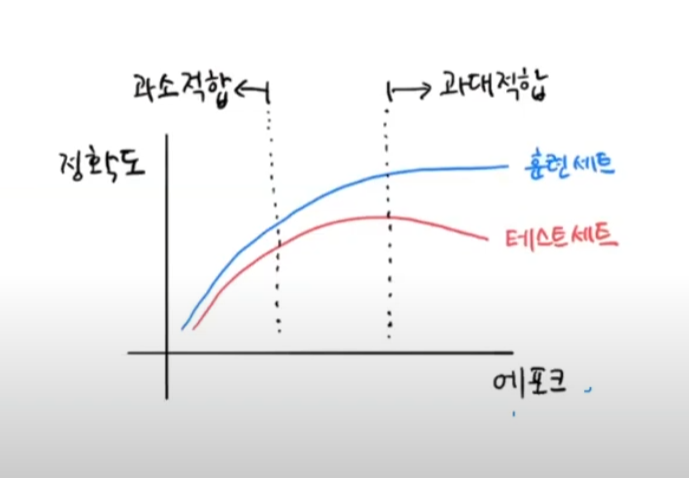

# 에포크와 과대/과소 적합

In [16]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [17]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    # partial_fit은 일부의 데이터만 들어올 수 있기 때문에 class 종류를 알려주는 것이 좋다.

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

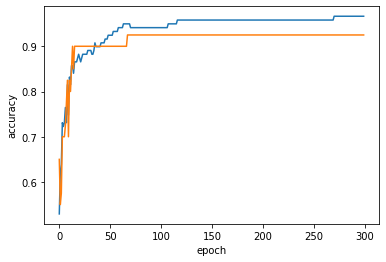

In [18]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

100정도면 최적의 에포크 횟수라 할 수 있겠다.

In [19]:
# tol의 경우 일정 에포크 동안 성능이 향상되지 않으면 자동으로 멈추는 역할을 한다.
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


사실 SGDClassifier loss함수의 디폴트 값은 '힌지(hinge)'이다.

힌지 손실은 서포트 벡터 머신 이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수 이다.

로지스틱 손실과 힌지 손실을 비교해보자.

In [20]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


비슷비슷 하다.